# Logistic Regression

## 1. Load dataset

In [3]:
import numpy as np
import pandas as pd

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [4]:
dataset = pd.read_csv('kodit.csv', encoding='euc-kr')

In [5]:
dataset.head()

,고객번호,설립기간,상시직원수,기업규모코드,주요사업장담보제공여부,주사업장담보설정금액,주요사업장건물규모면적,주요사업장대지규모면적,주요사업장월세금액,주요사업장전세금액,...,운전자금합계금액,무역금융합계금액,할인어음합계금액,지급보증합계금액,시설대여합계금액,총차입금합계금액,평가일이후최초부실발생,최근매출실적,당기매출실적,전기매출실적
0,89718313,1,1,4,0,0.0,0,0,3500,35,...,20,0,0,0,0,20,0,971,994,0
1,90651146,5,4,4,0,0.0,250,848,1500,20,...,0,0,0,20,12,32,0,3054,3054,3960
2,90597406,5,11,4,0,0.0,0,0,6500,100,...,607,0,0,0,162,769,0,0,1611,0
3,86393317,1,3,4,0,0.0,213,493,6000,60,...,50,0,0,0,0,50,0,563,961,0
4,90603765,0,0,4,1,420.0,181,58,0,0,...,460,0,0,0,350,810,0,0,0,0


## 1-1. Over smpling dataset load

In [6]:
X_train = pd.read_csv('X_train.csv', encoding='euc-kr')
X_test = pd.read_csv('X_test.csv', encoding='euc-kr')
y_train = pd.read_csv('y_train.csv', encoding='euc-kr')
y_test = pd.read_csv('y_test.csv', encoding='euc-kr')

# 2. Logistic Regression

## 2-2 Model


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred, y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:55.10590806575368
Test Set Accuracy:71.23873052269529


## 2-2. Predictive performance
- Confusion matrix, ACC, F1, ROC curve, AUC

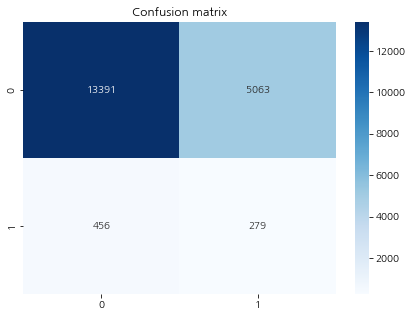

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
classes = [0,1]
cf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues',fmt=".0f")
plt.title('Confusion matrix');
# plt.savefig('confusion_matrix.png',dpi=300)

In [24]:
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,y_test_pred))
print("\nClassification Report:\n%s"%classification_report(y_test, y_test_pred))


Confusion Matrix:
[[13391  5063]
 [  456   279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     18454
           1       0.05      0.38      0.09       735

    accuracy                           0.71     19189
   macro avg       0.51      0.55      0.46     19189
weighted avg       0.93      0.71      0.80     19189



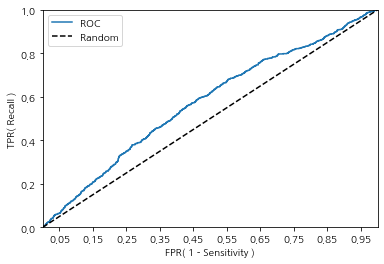

In [25]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_test, lr.predict_proba(X_test)[:, 1] )

In [26]:
from sklearn.metrics import roc_auc_score

pred_proba = lr.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)

print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.5736
